### 1. Business Problems
 
    - Vấn đề 1 : Tìm những column quyết định đến việc rời đi hay ở lại của một nhân viên
    - Vấn đề 2 : Tìm những column quyết định đến mức độ hài lòng của một nhân viên
    - Vấn đề 3 : Khi nào thì nhân viên sẽ rời đi

### 2. Đọc dataset và đưa ra giải thuyết

Giải thích các column trong dataset
    - Attribute : Yes/No nghĩa là nhân viên có còn làm việc hay không
    - EmployeeCount nghĩa là số lượng nhân viên 
    - EmployeeNumber : nghĩa là số nhân viên hiện có 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder() # xử lý dữ liệu chữ

In [2]:
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [48]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
data.shape == data.dropna().shape 

True

In [5]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
data_age = data['Age'].value_counts()

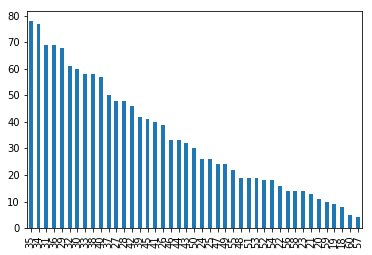

In [7]:
data_age.plot.bar()

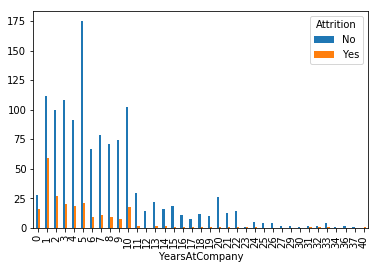

In [77]:
pd.crosstab(data.YearsAtCompany, data.Attrition).plot(kind="bar")

Số người làm việc dưới 10 năm có xu hướng nghỉ nhiều và ít dần với thời gian lớn hơn => điều đó khá là tự nhiên

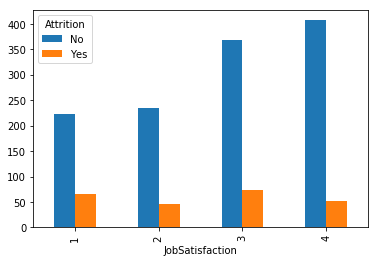

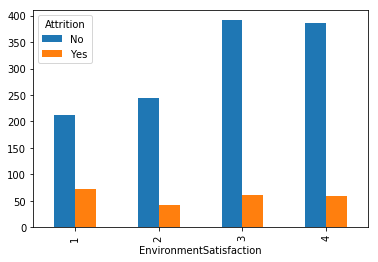

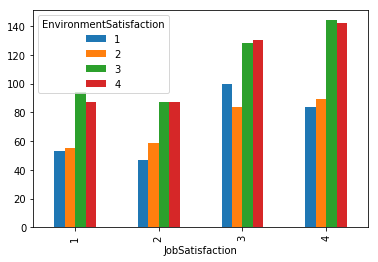

In [80]:
pd.crosstab(data.JobSatisfaction, data.Attrition).plot(kind="bar")
pd.crosstab(data.EnvironmentSatisfaction, data.Attrition).plot(kind="bar")
pd.crosstab(data.JobSatisfaction, data.EnvironmentSatisfaction).plot(kind="bar")

mức độ hài lòng về công việc khá cao, 3 và 4 chiếm hơn 70% nhưng điều đó không giúp người bỏ việc ít hơn 

mức độ hài lòng về môi trường cũng như vậy

<BarContainer object of 2 artists>

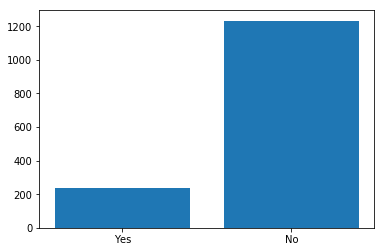

In [8]:
data[data['Attrition']=='Yes'].shape[0]
data[data['Attrition']=='No'].shape[0]
y_bar = np.array([data[data['Attrition']=='Yes'].shape[0],
                     data[data['Attrition']=='No'].shape[0]])
x_bar = ['Yes', 'No']
plt.bar(x_bar,y_bar) # tỉ lệ nghỉ việc gần 80%

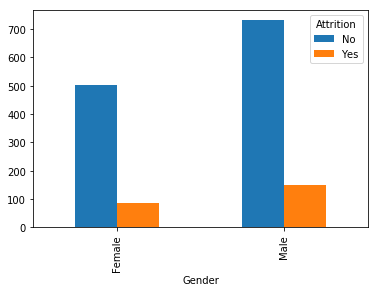

In [9]:
pd.crosstab(data.Gender, data.Attrition).plot(kind="bar") # tỉ lệ nghĩ việc của nam và nữ

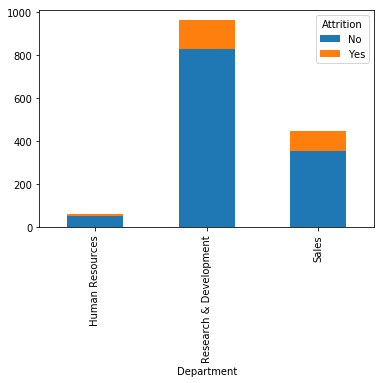

In [10]:
pd.crosstab(data.Department, data.Attrition).plot(kind="bar", stacked=True) # tỉ lệ nghĩ việc với từng ngành

Ta nhận thấy công việc Research & Development có số lượng nghỉ việc cao hơn tất cả các ngành nghề còn lại cũng có thể là do số lượng tuyển nhiều nên số lượng nghỉ việc cũng nhiều

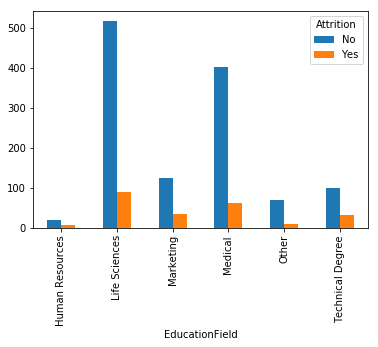

In [11]:
pd.crosstab(data.EducationField, data.Attrition).plot(kind="bar", stacked=False) # tỉ lệ nghỉ việc tương ứng với education

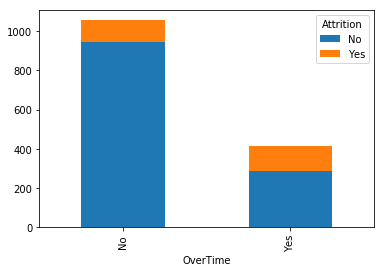

In [12]:
pd.crosstab(data.OverTime, data.Attrition).plot(kind="bar", stacked=True) # tỉ lệ nghỉ việc tương ứng với overtime

Và số lượng nhân viên không overtime cũng nghỉ việc rất nhiều , có nghĩa là nhân viên làm ít việc cũng sẽ nghỉ

#### Tiến hành sử dụng model để dự đoán Attrition

Bước đầu chúng ta sẽ thử đối với các thuật toán classification xem kết quả như thế nào

In [13]:
data_tar = data.drop(['Attrition'], axis=1) # drop attrition khỏi mô hình train

In [14]:
y = data['Attrition']

In [15]:
from sklearn.model_selection import train_test_split # tách dữ liệu để train

In [16]:
x_train, x_test, y_train, y_test = train_test_split(data_tar, y, train_size=0.8, random_state=0)

In [17]:
def encoding(data): #chuyển đổi dữ liệu chữ thành số
    categorical = []
    for col, value in data.iteritems():
        if value.dtype == "object":
            categorical.append(col)  # lấy những phần tử là categorical
    
    numerical = data.columns.difference(categorical) # những column là số
    attrition_cat = data[categorical]
    attrition_cat = pd.get_dummies(attrition_cat) # dummies data categorical
    attrition_num = data[numerical] # data số
    attrition_final = pd.concat([attrition_num, attrition_cat], axis=1) # gộp 2 bảng này lại
    return attrition_final

In [18]:
x_train_encode = encoding(x_train)

In [19]:
x_test_encode = encoding(x_test)

In [20]:
def target_encode(data):
    target_map = {"Yes":1, "No":0}
    
    target = data.apply(lambda x:target_map[x])
    return target

In [21]:
y_train_encode = target_encode(y_train)

In [22]:
y_test_encode = target_encode(y_test)

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
# Gradient boosting machine là một phương pháp rất hiệu quả trong bài toán supervised learning với dữ liệu dạng bảng 
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, log_loss, classification_report

In [52]:
seed = 0 
oversampler=SMOTE(random_state=0)

smote_train,smote_target=oversampler.fit_sample(x_train_encode,y_train_encode)
gb_params ={
'n_estimators': 1500,
'max_features': 0.9,
'learning_rate' : 0.25,
'max_depth': 4,
'min_samples_leaf': 2,
'subsample': 1,
'max_features' : 'sqrt',
'random_state' : seed,
'verbose': 0
}
#setup các param 

In [25]:
gb = GradientBoostingClassifier(**gb_params) #setting thuật toán với các params 

In [26]:
gb.fit(smote_train, smote_target) # tiến hành train model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.25, loss='deviance', max_depth=4,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1500,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [111]:
gb_predictions = gb.predict(x_test_encode)  # dự đoán dữ liệu test bằng model trên

In [112]:
gb_predictions

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [29]:
print(accuracy_score(y_test_encode, gb_predictions)) # so sánh độ chính xác của dự đoán với y_test

0.8639455782312925


In [30]:
print(classification_report(y_test_encode, gb_predictions))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       245
           1       0.66      0.39      0.49        49

    accuracy                           0.86       294
   macro avg       0.77      0.67      0.70       294
weighted avg       0.85      0.86      0.85       294



In [31]:
features = x_train_encode.columns.values

'Over18_Y'

In [32]:
importances = gb.feature_importances_ # các biến quan trọng trong mô hình

In [33]:
indices = np.argsort(importances) # sắp xếp và trả về index theo thứ tự

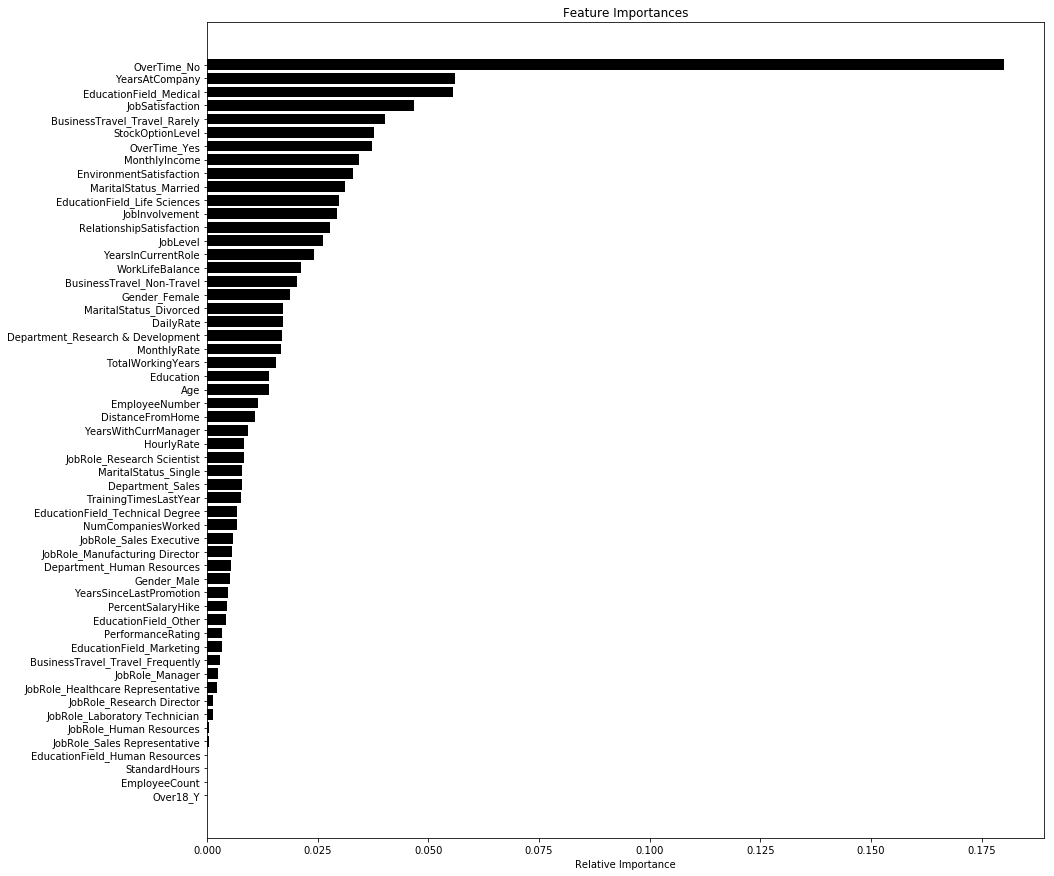

In [34]:
plt.figure(figsize=(15,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='black', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Qua bảng phân tích các biến quan trọng đối với mô hình thì ta nhận thấy
    
    - Top 1 là những nhân viên không overtime sẽ nghỉ việc nghĩa là không có việc để làm sẽ nghỉ việc
    - Top 2 sẽ là số năm làm việc tại công ty
    - Top 3 sẽ là những người học medical cũng sẽ nghỉ việc nhiều 

### Thực hiện model với thuật toán Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest parameters
rf_params = {
'n_jobs': -1,
'n_estimators': 1000,
'max_features': 0.3,
'max_depth': 4,
'min_samples_leaf': 2,
'max_features' : 'sqrt',
'random_state' : seed,
'verbose': 0
}


In [55]:
rf = RandomForestClassifier(**rf_params)
rf.fit(smote_train, smote_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [57]:
rf_predictions = rf.predict(x_test_encode)
print(accuracy_score(y_test_encode, rf_predictions))

0.8537414965986394


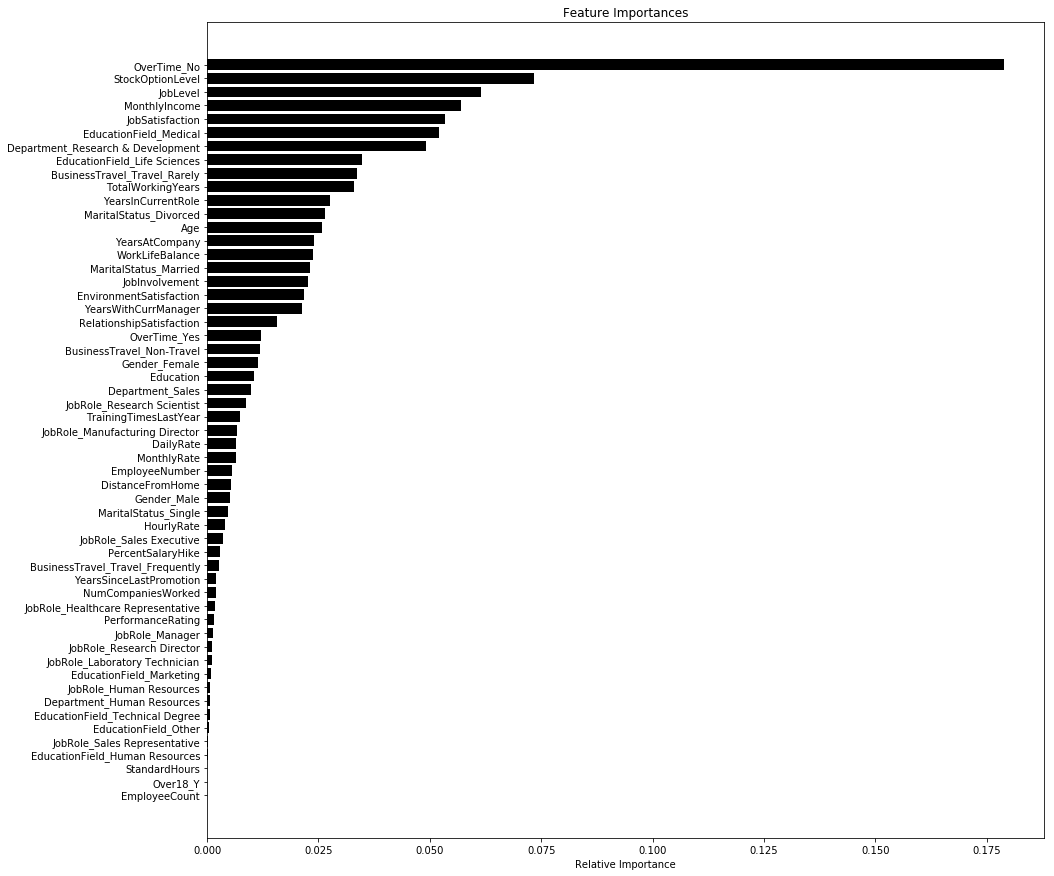

In [61]:
features = x_train_encode.columns.values
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(15,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='black', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Top 1 vẫn là Overtime No

### => Kết luận là nếu nhân viên có quá ít việc thì nhân viên sẽ nghỉ

### Tiến hành sử dụng model để dự đoán satisfaction

In [35]:
data_dsat = data.drop(['JobSatisfaction'], axis=1) # drop job satisfaction khỏi model 

In [36]:
y_sat = data["JobSatisfaction"]

In [83]:
x_train_sat, x_test_sat, y_train_sat, y_test_sat = train_test_split(data_dsat, y_sat, train_size=0.8, random_state=0)

In [113]:
x_train_sat_encode = encoding(x_train_sat)
x_test_sat_encode = encoding(x_test_sat)
smote_train_sat, smote_target_sat = oversampler.fit_sample(x_train_sat_encode, y_train_sat)
smote_test_sat, smote_test_target_sat = oversampler.fit_sample(x_test_sat_encode, y_test_sat)

Tôi đã tiến hành randomforetclassification và gradientbooting với target là JobSatisfaction nhưng 
kết quả là quá thấp 27% , nên ta sẽ sử dụng phương pháp khác

In [100]:
from xgboost import XGBClassifier

In [101]:
XGB = XGBClassifier()

In [102]:
XGB.fit(smote_train_sat, smote_target_sat)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [115]:
XGB_predictions = XGB.predict(smote_test_sat)

In [116]:
accuracy_score(smote_test_target_sat, XGB_predictions)

0.3377659574468085

=> Các thuật toán phân loại không thể áp dụng cho trường hợp này